In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [1]:
arb_tuple = (3, 4)
arb_list = [3, 4]

In [4]:
arb_tuple[0] = 1000

TypeError: 'tuple' object does not support item assignment

In [3]:
arb_list

[1000, 4]

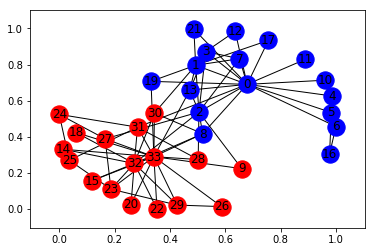

In [2]:
# ex. 2 (VI.1)

def spectralBi (G, n1):
    L = nx.laplacian_matrix (G).asfptype().todense ()
    nodes = G.nodes ()
    n = len (nodes)
    
    lamb, vect = np.linalg.eig (L)
    ind = np.argmin (lamb)
    lamb[ind] = 100000
    ind = np.argmin (lamb)
    
    v2 = vect[:, ind]
    vals = []
    for i in range (len (v2)):
        vals.append ((v2[i], i))
    vals.sort ()
    
    p1 = {}
    p2 = {}
    for i in range (n1):
        p1[nodes[vals[i][1]]] = 1
        p2[nodes[vals[n - i - 1][1]]] = 1
    for i in range (n1, n):
        p1[nodes[vals[i][1]]] = 0
        p2[nodes[vals[n - i - 1][1]]] = 0
        
    if R (G, p1) < R (G, p2):
        return p1
    else:
        return p2
    
        
def R (G, p):
    r = 0
    for n1 in G.nodes ():
        for n2 in G.nodes ():
            if p[n1] != p[n2] and G.has_edge (n1, n2):
                r += 1 # for weighted graphs, should be incremented by weight
    return r
        

G = nx.karate_club_graph ()
res = spectralBi (G, 17)
pos = nx.spring_layout (G)
nx.draw_networkx_nodes (G, pos, [n for n in G.nodes() if res[n] == 1], node_color='r')
nx.draw_networkx_nodes (G, pos, [n for n in G.nodes() if res[n] != 1], node_color='b')
nx.draw_networkx_edges (G, pos)
nx.draw_networkx_labels (G, pos)
plt.show ()

In [12]:
import networkx.algorithms as algo

number of communities:  4  modularity:  0.4188034188034188


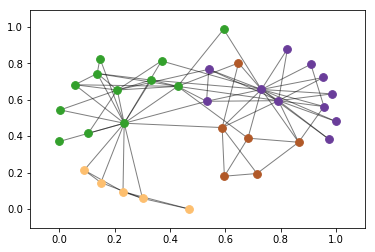

number of communities:  4  modularity:  0.17666089965397921


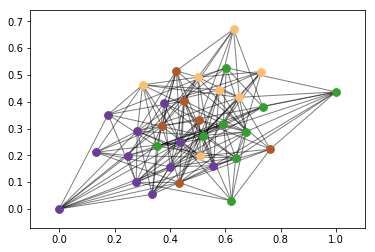

In [6]:
import community
import matplotlib as mpl

def partition_and_draw (G):
    pos = nx.spring_layout(G)
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    count = 0.
    cm = plt.cm.ScalarMappable(cmap = plt.get_cmap('Paired'), 
                                norm = mpl.colors.Normalize(vmin = 0, vmax = size, clip = False))
    print ("number of communities: ", int(size), " modularity: ", community.modularity (partition, G))
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys()
                                    if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 60, node_color = cm.to_rgba (count))


    nx.draw_networkx_edges(G,pos, alpha=0.5)
    plt.show()
    
partition_and_draw (nx.karate_club_graph())
partition_and_draw (nx.erdos_renyi_graph (33, 0.3))

In [8]:
# ex VI.2

def modularity (G, p):
    q = 0.0
    degs = nx.degree (G)
    m2 = 1.0 * sum (degs.values ())
    for n1 in G.nodes ():
        for n2 in G.nodes ():
            if p[n1] == p[n2]:
                if G.has_edge (n1, n2):
                    q += 1 # for weighted graphs, should be incremented by weight
                q -= degs[n1] * degs[n2] / m2
    q /= m2
    return q

print (modularity (G, res))

0.3582347140039433
